### Описаниезадания 

1. Дан датасет, в котором указаны параметры дома и цена (price) продажи этого дома в период 2014-2015 годов.
2. Есть две таблицы train.csv для обучения модели и test.csv (без колонки price) для предсказания параметра price.
2. Исследовать данные и сделать модель, которая будет предсказывать стоимость дома (price).
4. Метрика оценки качества модели – RMSE.
5. При выполнении задания важно то, как вы исследуете данные и как приходите к выбору той или иной модели. Не делайте слишком сложные модели. 
6. В качестве выполненного задания присылайте: 
    1. табличку с предсказанными результатами
    2. тетрадку jupyter - python с вашим исследованием данных и выбором модели для предсказания.

#### Описание данных

1. date - Дата продажи дома
2. price - Стоимость продажи дома (предсказываемая переменная)
3. bedrooms - Количество спальных комнат
4. bathrooms - Количество ванных комнат
5. sqft_living - Площадь дома
6. sqft_lot - Площадь нежилой части (участка) 
7. floors - Количество этажей в доме
8. waterfront - Дом с видом на набережную
9. view - Был просмотрен
10. condition - Насколько хорошее состояние дома (в целом)
11. grade - Общий класс, присвоенный жилищному блоку, в котором находится дом.
12. sqft_above - Площадь дома без подвала
13. sqft_basement - Площадь подвала
14. yr_built - Год построения дома
15. yr_renovated - Год реконструкции дома
16. zipcode - Индекс
17. lat - Координата широты
18. long - Координата долготы
19. sqft_living15 - Площадь жилой части дома после реновации в 2015 году. Подразумевает - некоторые ремонтные работы. Это может повлиять или не повлиять на площадь участка 
20. sqft_lot15 - Площадь нежилой части (участка) после реновации в 2015 году

In [4]:
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import os

In [5]:
train_df = pd.read_csv(os.path.join(os.getcwd(), "input/train_data.csv"))
test_df = pd.read_csv(os.path.join(os.getcwd(), "input/test_data.csv"))
train_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20140915T000000,392000.0,4,3.75,2220,3797,1.5,0,0,4,6,1330,890,1917,0,98108,47.5574,-122.315,1490,4340
1,20140730T000000,300000.0,3,2.25,1960,1585,2.0,0,0,3,7,1750,210,2003,0,98118,47.5414,-122.288,1760,1958
2,20150325T000000,440000.0,2,1.50,1330,15873,1.0,0,0,3,7,900,430,1984,0,98074,47.6359,-122.033,1610,12043
3,20150219T000000,800500.0,4,2.50,1780,11130,1.0,0,0,5,8,1780,0,1962,0,98005,47.5931,-122.178,2610,11130
4,20140701T000000,485000.0,4,1.75,1430,4096,2.0,0,0,3,7,1430,0,1900,0,98122,47.6040,-122.306,1640,3377


Разведочный анализ. 
Для того, что бы попытаться визуально установить наличие: 
* выбросов
* распределение данных 
* связей между признаками

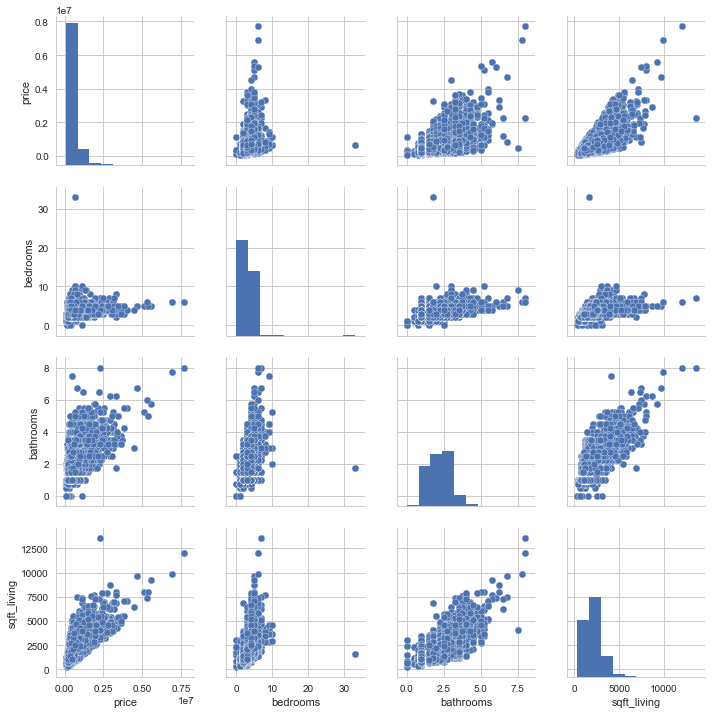

In [6]:
sns.set(style='whitegrid', context='notebook')
cols = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 
]
sns.pairplot(train_df[cols], size=2.5)
plt.show()

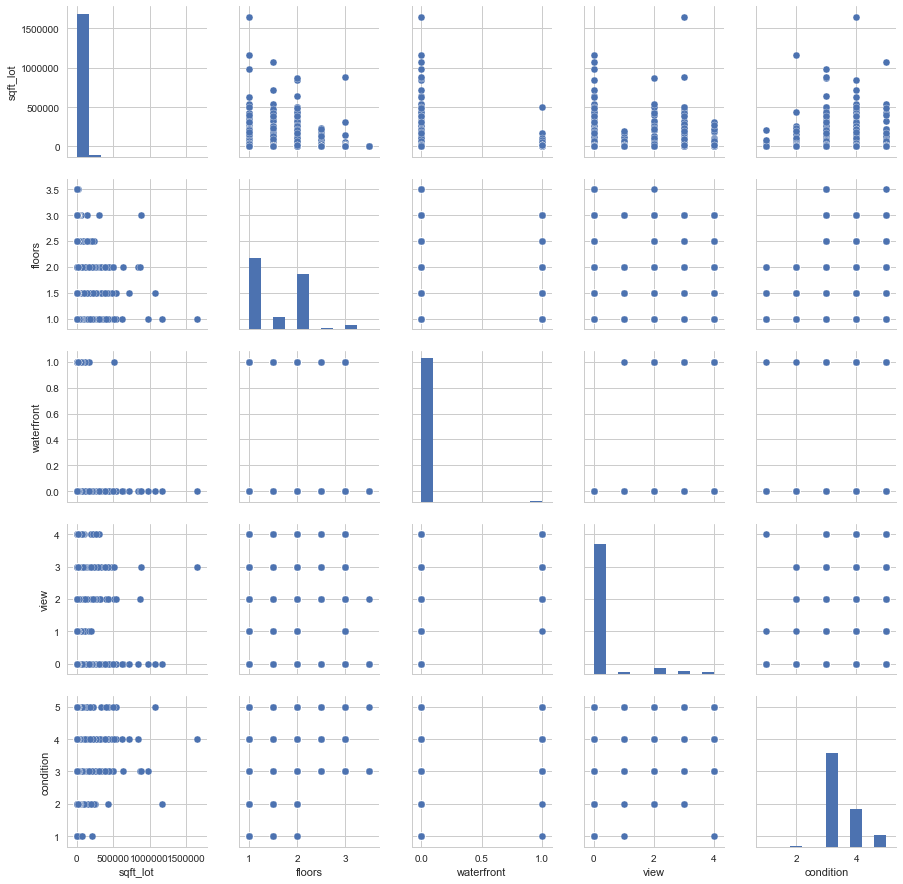

In [12]:
sns.set(style='whitegrid', context='notebook')
cols = [
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
]
sns.pairplot(train_df[cols], size=2.5)
plt.show()

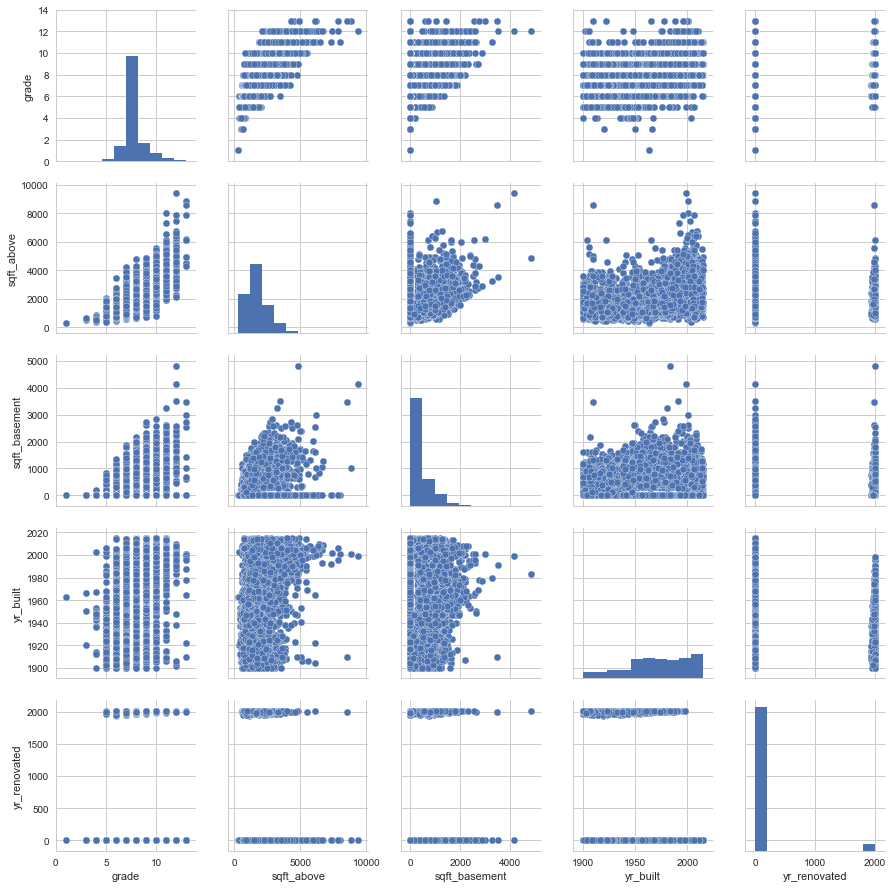

In [14]:
sns.set(style='whitegrid', context='notebook')
cols = [
    'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 
]
sns.pairplot(train_df[cols], size=2.5)
plt.show()

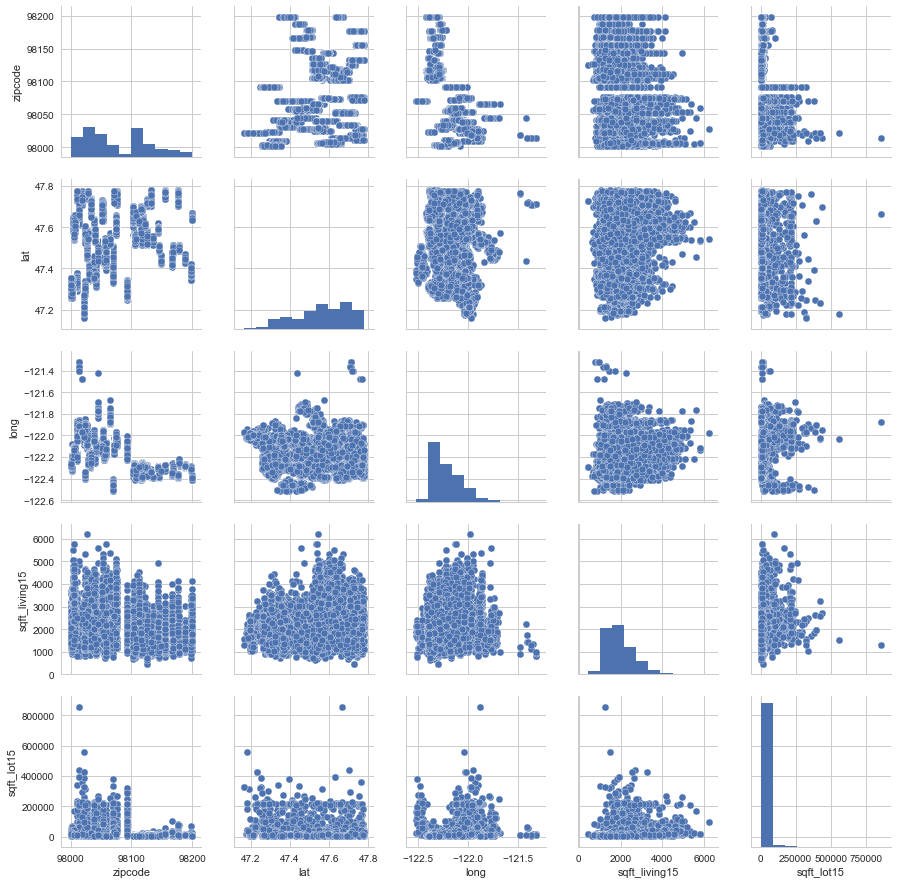

In [16]:
sns.set(style='whitegrid', context='notebook')
cols = [
    'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
]
sns.pairplot(train_df[cols], size=2.5)
plt.show()


Построение корреляционной матрицы

In [7]:
# 'date',
all_cols = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
    'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
    'sqft_living15', 'sqft_lot15'
]

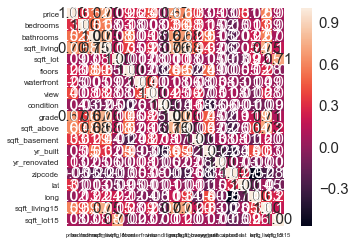

In [8]:
import numpy as np
train_df[all_cols]
cm = np.corrcoef(train_df[all_cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=all_cols, xticklabels=all_cols)
hm.set_yticklabels(hm.get_yticklabels(), rotation=0, fontsize=8)
hm.set_xticklabels(hm.get_xticklabels(), rotation=0, fontsize=6)
plt.show()

На карте корреляций и 
Признаки, которые коррелируют с ценой со значением > 0.5

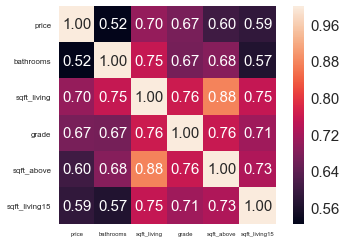

In [9]:
corr_cols = [
    'price', 'bathrooms', 'sqft_living',
    'grade', 'sqft_above','sqft_living15'
]
cm = np.corrcoef(train_df[corr_cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
                 yticklabels=corr_cols, xticklabels=corr_cols)
hm.set_yticklabels(hm.get_yticklabels(), rotation=0, fontsize=8)
hm.set_xticklabels(hm.get_xticklabels(), rotation=0, fontsize=6)
plt.show()

In [ ]:
# провека нескольких моделей с использованием отфильтрованных признаков
Xtrn, Xtest, Ytrn, Ytest = train_test_split(train_df[corr_cols[1:]], train_df[['price']],                                            test_size=0.2)
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, max_features='sqrt'),
    KNeighborsRegressor(n_neighbors=6),
    SVR(kernel='linear'),
    LogisticRegression()
]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
    # get model name
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    # fit model on training dataset
    model.fit(Xtrn, Ytrn['price'])
    tmp['rmse'] = np.sqrt(mean_squared_error(Ytest['price'], model.predict(Xtest)))
    tmp['R2_Price'] = r2_score(Ytest['price'], model.predict(Xtest))
    # write obtained data
    TestModels = TestModels.append([tmp])
    # вывод данных: актуальная цена, предсказанная цена, метрики rmse и r2      
    print(Ytest['price'].values[0], model.predict(Xtest)[0], tmp['rmse'], tmp['R2_Price'])

TestModels.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.rmse.plot(ax=axes, kind='bar', title='rmse')
plt.show()

710000.0 539435.191333 245257.737578 0.547146091341
710000.0 448617.09 228011.869236 0.608593895302
710000.0 455841.666667 260649.774191 0.488521490224
710000.0 493972.165352 267322.788144 0.461997059497


Проверка моделей с полным набором признаков(исключена дата)


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


425000.0 223556.853414 203434.486468 0.677806997765
425000.0 389069.17 137282.511939 0.853277275117
425000.0 441333.333333 262111.264345 0.465142216295


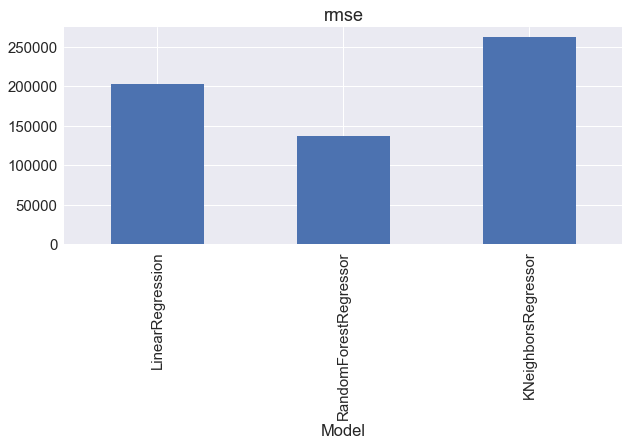

In [10]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(train_df[all_cols[1:]], train_df[['price']],                                            test_size=0.2)
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, max_features='sqrt'),
    KNeighborsRegressor(n_neighbors=6),
#     SVR(kernel='linear'), слишком долго считается
#     LogisticRegression() слишком долго считается
]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
    # get model name
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    # fit model on training dataset
    model.fit(Xtrn, Ytrn['price'])
    tmp['rmse'] = np.sqrt(mean_squared_error(Ytest['price'], model.predict(Xtest)))
    tmp['R2_Price'] = r2_score(Ytest['price'], model.predict(Xtest))
    # write obtained data
    TestModels = TestModels.append([tmp])
    # вывод данных: актуальная цена, предсказанная цена, метрики rmse и r2      
    print(Ytest['price'].values[0], model.predict(Xtest)[0], tmp['rmse'], tmp['R2_Price'])

TestModels.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.rmse.plot(ax=axes, kind='bar', title='rmse')
plt.show()

RandomForest показал себя хорошо, поэксперементируем с ним

1250000.0 1158303.5 136479.303471 0.860797763321
1250000.0 1191731.18667 137131.987454 0.859463168027
1250000.0 1209553.08462 136439.729724 0.860878478204
1250000.0 1198036.66667 134899.019618 0.864002725257
1250000.0 1178567.65 138157.202656 0.857353972635
1250000.0 1229354.05556 139309.013651 0.854965589748
1250000.0 1246935.9625 136301.430602 0.861160370187
1250000.0 1227562.07143 138611.193595 0.856414949481


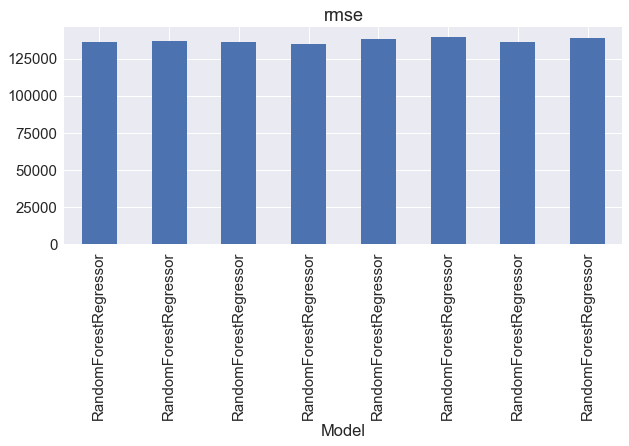

In [11]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(train_df[all_cols[1:]], train_df[['price']],
                                            test_size=0.2)

models = [
    RandomForestRegressor(n_estimators=200, max_features='sqrt'),
    RandomForestRegressor(n_estimators=150, max_features='sqrt'),
    RandomForestRegressor(n_estimators=130, max_features='sqrt'),
    RandomForestRegressor(n_estimators=110, max_features='sqrt'),
    RandomForestRegressor(n_estimators=100, max_features='sqrt'),
    RandomForestRegressor(n_estimators=90, max_features='sqrt'),
    RandomForestRegressor(n_estimators=80, max_features='sqrt'),
    RandomForestRegressor(n_estimators=70, max_features='sqrt'),
          ]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    model.fit(Xtrn, Ytrn['price'])
    tmp['rmse'] = np.sqrt(mean_squared_error(Ytest['price'], model.predict(Xtest)))
    tmp['R2_Price'] = r2_score(Ytest['price'], model.predict(Xtest))
    print(Ytest['price'].values[0], model.predict(Xtest)[0], tmp['rmse'], tmp['R2_Price'])
    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.rmse.plot(ax=axes, kind='bar', title='rmse')
plt.show()

Отпимальное число n_estimators находится около 100, предсказания будут производиться со случайным лесом с количеством деревьев равным 100

In [12]:
Xtrn = train_df[cols[1:]]
Ytrn = train_df[['price']]
Xtest = test_df[cols[1:]]
models = [RandomForestRegressor(n_estimators=100, max_features='sqrt')]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
    model.fit(Xtrn, Ytrn['price'])
    test_df['predicted_price'] = model.predict(Xtest).round(2)

test_df.to_csv("output/predicted.csv")